#### STDLIB

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import division
# do we need anything else?

#### Useful Functions/Constants for this homework

In [3]:
h = 4.136e-15 # Planck constant in eV s
kb = 8.617e-5 # Boltzmann constant in eV / K
eV_to_joules = 1.602e-19 # eV to joules conversion factor
c_ang = 3e18 # speed of light in Angstroms / s
c_km = 3e5 # speed of light in km / s

def energy_in_eV(x, opt='lambda'):
    if opt == 'lambda':
        return h * c_ang / x
    elif opt == 'nu':
        return h * x

print 'Testing: h in joules:', h * eV_to_joules

lbl_ft_sz, title_ft_sz = 14, 20 # label and title font sizes

Testing: h in joules: 6.625872e-34


#### Problem 1

From the Lecture 6 notes, page 6, we can assume at low density $\left( n_e \ll 10^5 \ \textsf{cm}^{-3} \right)$ that collisional de-excitation is negligible so that the line intensity ratio $I[5755]/I[6548 + 6583]$ is (keeping in mind that $[\rm{N}II] \lambda 5755$ is a $^1 D \rightarrow ^1 S$ transition and $[\rm{N}II] \lambda 6548+6583$ are $^1 S \rightarrow ^3 P$ transitions)

$$\frac{I[5755]}{I[6548 + 6583]} = \frac{A_{^1 D, ^1 S}}{A_{^1 D, ^1 S} + A_{^3 P, ^1 D}} \frac{\Omega \left(^3 P, ^1 S \right)}{\Omega \left( ^3 P, ^1 D \right)} \frac{E \left(^3 P, ^1 D\right)}{E \left(^1 D, ^1 S\right)} \exp \left( \left( -E \left(^1 S \right) + E \left( ^1 D \right) \right) \ / \ kT \right),$$

(see pg. 210 in Draine or [here](http://www.astronomy.ohio-state.edu/~pogge/Ast871/Notes/Ionized.pdf), pg. 39, for the same equation above written slightly differently; this link comes from an OSU ISM course with superb notes.) For very high density regions in LTE, we can use eq. 18.8 from Draine:

$$\frac{I[5755]}{I[6548 + 6583]} = \frac{g_{^1 D, ^1 S} A_{^1 D, ^1 S} E\left(^1 D, ^1 S \right)}{g_{^3 P, ^1 D} A_{^3 P, ^1 D} E \left( ^3 P, ^1 D \right)} \exp \left( \left( - E \left(^1 S \right) + E \left( ^1 D \right) \right) \ / \ kT \right). $$

Alternative values of Einstein $A$ coeffiecients for forbidden lines can be found [here](https://books.google.com/books/about/The_Physics_and_Dynamics_of_Planetary_Ne.html?id=xxVkZBVIZeAC), pg. 35. I _think_ the curves below are accurate; see [here](http://pulsar.sternwarte.uni-erlangen.de/wilms/teach/ism/ismchap7.pdf) for the [OIII] line ratio as a function of temperature.

The critical density separates the low and high density regimes (see pg. 20 [here](http://www.astronomy.ohio-state.edu/~pogge/Ast871/Notes/Ionized.pdf) or pg. 1 in the Lecture 7 notes):

$$ n_{crit} = \frac{A_{ul}}{q_{ul}}, $$

where $A_{ul}$ is the Einstein A coefficient for the transition between upper and lower levels, and $q_{ul}$ is the de-excitation rate between upper and lower levels. 

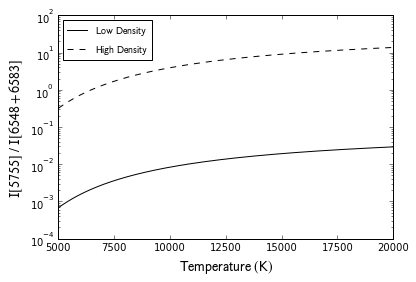

Densities in cm^-3 at 10^4 K:
Critical density for low density regimes: 7.752e+04
Critical density for high density regimes: 3.269e+07


In [32]:
A_1d_1s, A_3p_1s, A_3p_1d = 1.1, 3.4e-2, 4e-3 # Einstein A coefficients
omega_3p_1s, omega_3p_1d = 0.36, 2.99 # effective collision strengths

# for the ratio of energies, we can find a weighted ratio of wavelengths - eq. from first link above, values from second link
A_1d_3p2, A_1d_3p1 = 3e-3, 1e-3
weight_wavelength = (A_1d_3p2 * 6583 + A_1d_3p1 * 6548) / (A_1d_3p2 + A_1d_3p1)
e_ratio = 5755 / weight_wavelength # invert as E \propto 1 / \lambda

temps = np.linspace(5000, 20000, 501) # temperatures in K

n2_line_ratio_small_density = (A_1d_1s / (A_1d_1s + A_3p_1s)) * (omega_3p_1s / omega_3p_1d) *\
    e_ratio * np.exp((- energy_in_eV(3063) + energy_in_eV(weight_wavelength)) / (kb * temps))

g_1d_1s, g_3p_1d = 2 * 0 + 1, 2 * 2 + 1 # degeneracies
n2_line_ratio_high_denisty = (g_1d_1s / g_3p_1d) * (A_1d_1s / A_3p_1d) * e_ratio \
    * np.exp((- energy_in_eV(3063) + energy_in_eV(weight_wavelength)) / (kb * temps))
    
# adjust LaTeX font in plots to sans-serif
params = {'text.usetex': False, 'mathtext.fontset': 'stixsans'}
plt.rcParams.update(params)
    
# plots
#plt.semilogy(temps, .14 * np.exp(-25e3 / temps))
plt.semilogy(temps, n2_line_ratio_small_density, color='k', label=r'$\rm{Low \ Density}$')
plt.semilogy(temps, n2_line_ratio_high_denisty, color='k', linestyle='--', label=r'$\rm{High \ Density}$')
#plt.semilogy(temps, 1 / (6.91 * np.exp(25000 / temps)), color='maroon', label='From OSU Notes, pg. 40')
plt.ylabel(r'$\rm{I}[5755] \ / \ \rm{I}[6548 + 6583]$', size=lbl_ft_sz)
plt.xlabel(r'$\rm{Temperature \ (K)}$', size=lbl_ft_sz)
plt.xlim(5000, 20000)
plt.xticks(np.linspace(5000, 20000, 7))
plt.legend(loc='best', fontsize=10, numpoints=1)
plt.show()

# critical density
q_3p_1d = 8.629e-8 * (2.99 / 5) #* (temps * 1e-4) ** -0.5
n_crit1 = A_3p_1d / q_3p_1d # marks transition from 3P levels to 1D levels
n_crit2 = 1.1 / (8.629e-8 * (0.39 / 1)) # marks transition from 1D to 1S

print 'Densities in cm^-3 at 10^4 K:'
print 'Critical density for low density regimes:', '%.3e' % n_crit1
print 'Critical density for high density regimes:', '%.3e' % n_crit2

#### Problem 2

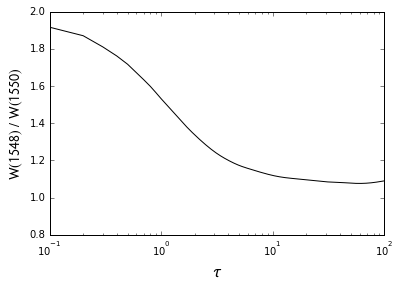

Tau for this doublet ratio: 0.964127139376
Doppler parameter for [CIV]1548 in km/s: 9.831e+00
Doppler parameter for [CIV]1550 in km/s: 9.897e+00
Column density in cm^-2: 8.1874412171e+13


In [26]:
from scipy.interpolate import interp1d

tau = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.8,\
       1.0, 1.2, 1.4, 1.6, 2., 3., 4., 6., 10, 20, 30, 40, 60, 100,\
      1e3, 1e4]

f = [0, 0.086, .165, .24, .309, .374, .435, .545, .643, .728,\
        .804, .872, .986, 1.188, 1.32, 1.483, 1.66, 1.86, 1.97, 2.04,\
        2.14, 2.26, 2.73, 3.12]

def f_tau(x):
    c = interp1d(tau, f, kind='cubic')
    return c(x)

taus = np.linspace(0, 1e2, 1001)
d_ratio = (1548 / 1550) * f_tau(2 * taus) / f_tau(taus)
plt.semilogx(taus, d_ratio, color='k')
plt.ylabel(r'$\rm{W}(1548) \ / \ \rm{W}(1550)$', size=lbl_ft_sz)
plt.xlabel(r'$\tau$', size=lbl_ft_sz + 3)
plt.plot()
plt.show()

w_ratio = 132 / 98.6 # equivalent width ratio
#print d_ratio[1.33], w_ratio
#print taus[np.where(abs((1548 / 1550) * f_tau(2 * taus) / f_tau(taus) - w_ratio) <= 1e-3)]
print 'Tau for this doublet ratio:', f_tau(1.916)

print 'Doppler parameter for [CIV]1548 in km/s:','%.3e' % ((c_ang / (2 * f_tau(2 * 1.916))) * (132e-3 / 1548) * 1e-13)
print 'Doppler parameter for [CIV]1550 in km/s:','%.3e' % ((c_ang / (2 * f_tau(1.916))) * (98.6e-3 / 1550) * 1e-13)

delta_nu = ((((c_ang / (2 * f_tau(1.916))) * (98.6e-3 / 1550) * 1e-13) / c_km) * (c_ang / 1550))
col_dens = ((1.916 * 9.11e-28 * 3e10) / (np.pi * 4.8e-10 ** 2)) * ((np.sqrt(np.pi) * delta_nu) / (0.1))
print 'Column density in cm^-2:', col_dens

#### Problem 3

Relevant equations are on pg. 10 of the Lecture 8 notes.

In [30]:
def find_abundance_rel_hydro(x):
    """Finds the abundance of an element relative to hydrogen."""
    return 10 ** (x - 12)

# C, Mg, Si, S, Fe in order
abundances = np.array([8.39, 7.53, 7.51, 7.14, 7.45])
depl_fact = np.array([-.47, -.81, -1.31, 0.23, -2.39])

n_e = sum(find_abundance_rel_hydro(abundances) * 10 ** depl_fact) * 100 # electron number density

n_ca = find_abundance_rel_hydro(6.31) * 100 # neutral calcium number density

ca_alpha, ca_alpha_plus = 2e-11, 5e-11 # neutral calcium and calcium ion recombination rate
xi_ca, xi_ca_plus = 2.8e-10, 0.018e-10 # neutral calcium and calcium ion ionization rate

print 'Number Densities in cm^-3:\n'
print 'n(Ca):', n_ca
print 'n(Ca+):', n_ca * xi_ca / (ca_alpha * n_e) 
print 'n(Ca++):', n_ca * xi_ca_plus / (ca_alpha_plus * n_e) 

Number Densities in cm^-3:

n(Ca): 0.000204173794467
n(Ca+): 0.251696972327
n(Ca++): 0.000647220785983
